In [3]:
import pandas as pd
!pip install biopython
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np


#upload 'ecoli_gls_coefficients.csv’and 'fit_organism_Keio.tsv'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 47.9 MB/s eta 0:00:00
Mounted at /content/drive


On UniprotKB ("https://www.uniprot.org/uniprotkb?dir=ascend&facets=model_organism%3A83333&query=ecoli&sort=organism_name" search ecoli and download as a tsv the following information (the important part is the Gene Names and the Sequence columns)

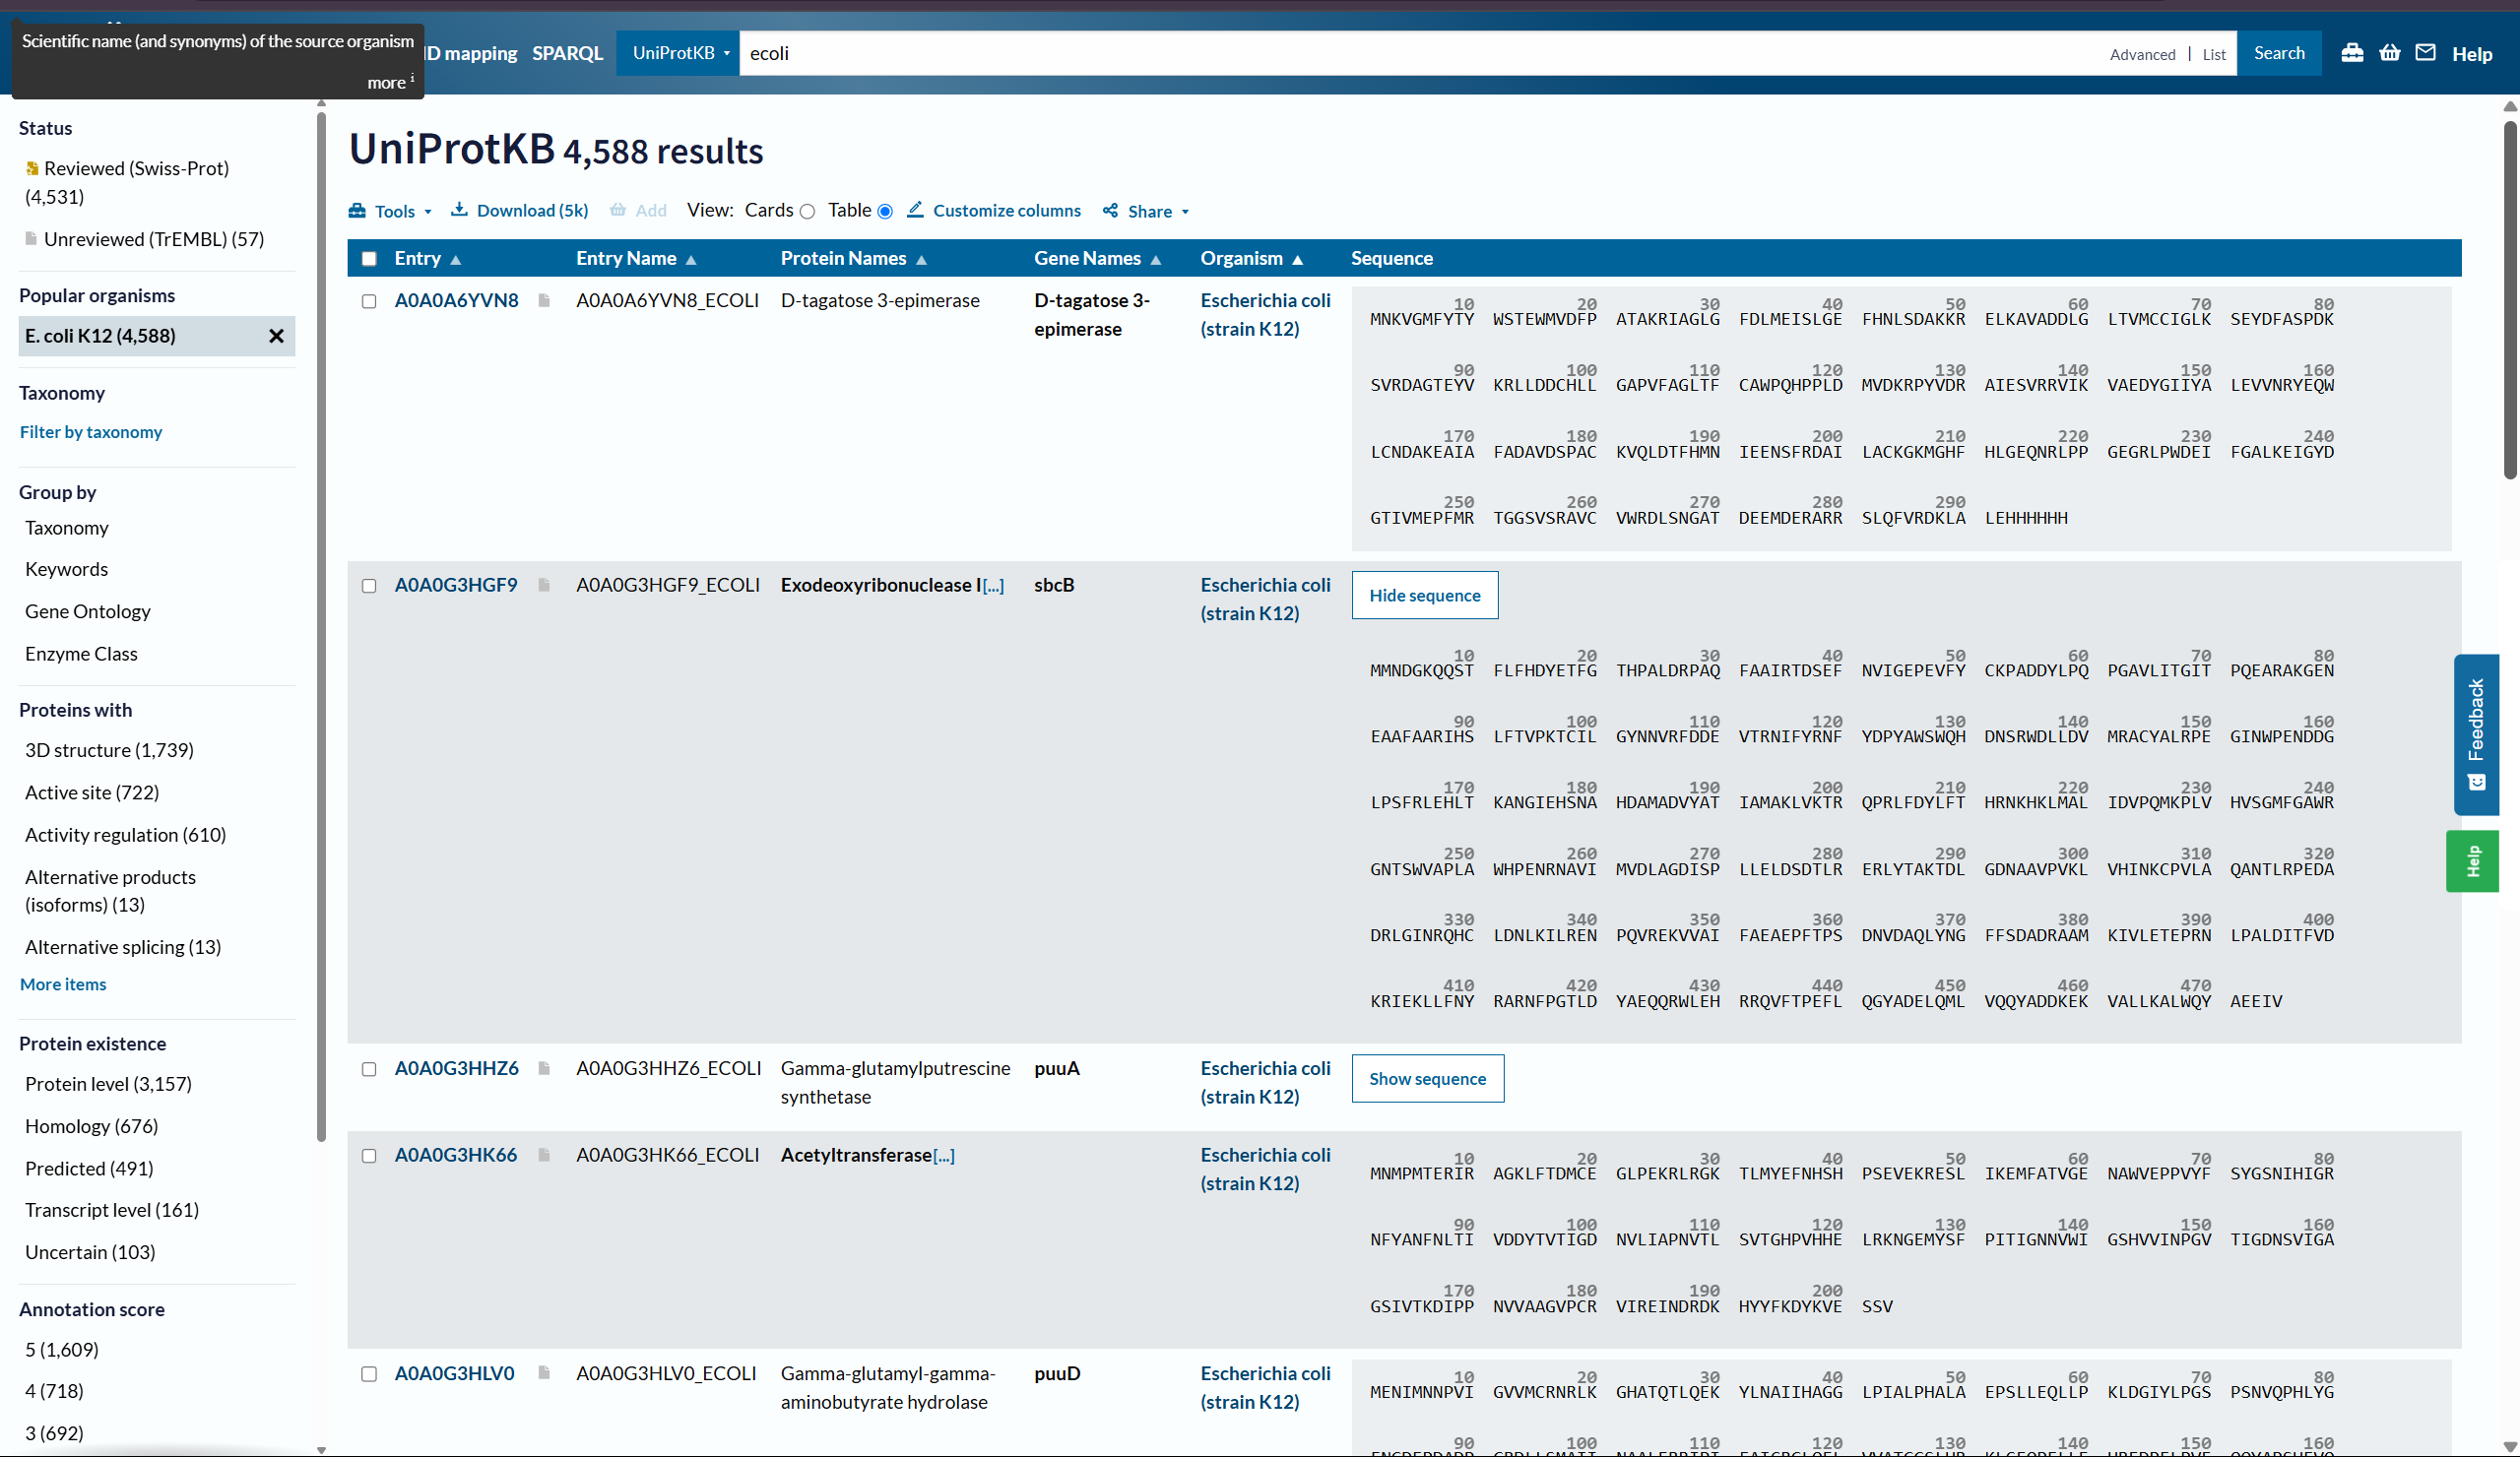

In [4]:
#If you are using google colab and want to take the files from the shared folder at https://drive.google.com/drive/folders/1-CfFsDSErSE719UJ20IgW3lo0sXQXNh1?usp=drive_link

# !ls /content/drive/MyDrive/Fitness_Map_Group_Project
# !cd /content/drive/MyDrive/Fitness_Map_Group_Project
# !cp /content/drive/MyDrive/Fitness_Map_Group_Project/*csv /content/
# !cp /content/drive/MyDrive/Fitness_Map_Group_Project/*faa /content/
# !cp /content/drive/MyDrive/Fitness_Map_Group_Project/*tsv /content/

250511-19_Fitness_Map_development.ipynb
Alphafold_2_outputs
ecoli_fitness_results.csv
ecoli_gls_coefficients.csv
ecoli_p_values.csv
ecoli_significant_interactions.csv
Fitness_Map_Gene_Pairs_Pearson_Correlations.ipynb
fit_organism_Keio.tsv
organism_Keio.faa
top_interaction_sequences.csv
uniprotkb_ecoli_AND_model_organism_8333_2025_06_02.tsv


In [6]:
#Obtain the top interacting genes based on the magnitude of the GLS coefficient for the gene pair

def get_top_interactions(coef_df, top_n=10):
    # Create a DataFrame to hold the coefficients and their corresponding gene pairs
    # Create a mask for non-diagonal elements
    mask = ~np.eye(coef_df.shape[0], dtype=bool)

    # Get indices where mask is True
    i_indices, j_indices = np.where(mask)

    # Create DataFrame directly from arrays
    interactions = pd.DataFrame({
        'gene1': coef_df.index[i_indices],
        'gene2': "Gene_" + coef_df.columns[j_indices],
        'coefficient': pd.to_numeric(coef_df.values[mask], errors='coerce')
    })
    interactions_df = pd.DataFrame(interactions)
    # Sort by absolute coefficient values and get top N interactions
    interactions_df = interactions_df.sort_values(by='coefficient', key=abs, ascending=False)
    interactions_df = interactions_df.head(top_n)

    return interactions_df


coef_df = pd.read_csv('ecoli_gls_coefficients.csv', index_col=0)

# top_interactions = get_top_interactions(coef_df, top_n=10)
top_interactions = get_top_interactions(coef_df, top_n=50)
print(top_interactions)

              gene1      gene2  coefficient
9725021   Gene_2567  Gene_1225     5.033844
10544578  Gene_2783  Gene_2574     4.562073
10543821  Gene_2783  Gene_1817     4.355901
12025962  Gene_3174  Gene_2850     4.136822
11273043  Gene_2975  Gene_3744     4.094814
393677     Gene_103  Gene_3514     4.055026
10545240  Gene_2783  Gene_3237     4.050859
12025961  Gene_3174  Gene_2849     3.873120
10542883  Gene_2783   Gene_879     3.862169
10544985  Gene_2783  Gene_2982     3.846149
10542110  Gene_2783   Gene_106     3.721365
10806226  Gene_2852  Gene_2850     3.665344
8151225   Gene_2151  Gene_3238     3.618890
11652907  Gene_3076  Gene_1019    -3.501067
13269366  Gene_3503     Gene_2     3.465682
2723483    Gene_718  Gene_3700     3.460303
10806225  Gene_2852  Gene_2849     3.449925
12911005  Gene_3408  Gene_1501     3.435351
13780748  Gene_3638     Gene_4     3.433179
393399     Gene_103  Gene_3236     3.422726
12025966  Gene_3174  Gene_2854     3.398975
10545241  Gene_2783  Gene_3238  

In [7]:
gene_info = pd.read_csv('fit_organism_Keio.tsv',sep = '\t')
gene_info.shape
pd.options.display.max_columns = None
gene_info.head()

,orgId,locusId,sysName,geneName,desc,set1IT003 D-Glucose (C),set1IT004 D-Glucose (C),set1IT005 D-Fructose (C),set1IT006 D-Fructose (C),set1IT009 D-Maltose (C),set1IT010 D-Maltose (C),set1IT011 D-Xylose (C),set1IT012 D-Xylose (C),set1IT013 D-Galactose (C),set1IT014 D-Galactose (C),set1IT015 D-Ribose (C),set1IT016 D-Ribose (C),set1IT017 L-Fucose (C),set1IT018 L-Fucose (C),set1IT019 a-Ketoglutaric (C),set1IT020 a-Ketoglutaric (C),set1IT021 D-Glucuronic Acid (C),set1IT022 D-Glucuronic Acid (C),set1IT023 D-Gluconic Acid (C),set1IT024 D-Gluconic Acid (C),set1IT025 D-Glucose-6-Phosphate (C),set1IT026 D-Glucose-6-Phosphate (C),set1IT027 acetate (C),set1IT028 acetate (C),set1IT031 D-Lactate (C),set1IT032 D-Lactate (C),"set1IT035 D,L-Lactate (C)","set1IT036 D,L-Lactate (C)",set1IT037 pyruvate (C),set1IT038 pyruvate (C),set1IT039 succinate (C),set1IT040 succinate (C),set1IT041 Glycolic Acid (C),set1IT042 Glycolic Acid (C),set1IT045 D-Galacturonic Acid (C),set1IT046 D-Galacturonic Acid (C),set1IT047 Glycerol (C),set1IT048 Glycerol (C),set1IT051 D-Sorbitol (C),set1IT052 D-Sorbitol (C),set1IT053 L-Malic (C),set1IT054 L-Malic (C),set1IT055 D-Trehalose (C),set1IT056 D-Trehalose (C),set1IT057 D-Serine (C),set1IT058 D-Serine (C),set1IT059 casaminos (C),set1IT060 casaminos (C),set1IT061 NAG (C),set1IT062 NAG (C),set1IT063 D-Glucosamine Hydrochloride (C),set1IT064 D-Glucosamine Hydrochloride (C),set1IT065 D-Mannose (C),set1IT066 D-Mannose (C),set1IT067 D-Galacturonic Acid (C) MOPS,set1IT068 D-Galacturonic Acid (C) MOPS,set1IT069 D-Glucose (C) MOPS,set1IT070 D-Glucose (C) MOPS,set1IT071 L-Arginine (N),set1IT072 L-Arginine (N),set1IT073 L-Aspartic Acid (N),set1IT074 L-Aspartic Acid (N),set1IT075 L-Serine (N),set1IT076 L-Serine (N),set1IT077 L-Asparagine (N),set1IT078 L-Asparagine (N),set1IT079 L-Glutamine (N),set1IT080 L-Glutamine (N),set1IT081 Glycine (N),set1IT082 Glycine (N),set1IT083 L-Alanine (N),set1IT084 L-Alanine (N),set1IT085 D-Serine (N),set1IT086 D-Serine (N),set1IT087 D-Alanine (N),set1IT088 D-Alanine (N),set1IT089 Gly-DL-Asp (N),set1IT090 Gly-DL-Asp (N),set1IT091 Gly-Glu (N),set1IT092 Gly-Glu (N),set1IT093 casaminos (N),set1IT094 casaminos (N),set1IT095 Putrescine (N),set1IT096 Putrescine (N),set2IT005 Adenosine (N),set2IT006 Adenosine (N),set2IT007 Cytidine (N),set2IT008 Cytidine (N),set2IT009 Ammonium chloride (N),set2IT010 Ammonium chloride (N),set2IT013 nitrite 10 mM,set2IT014 nitrite 20 mM,set2IT018 Chlorite 0.4 mM,set2IT019 Chlorite 1.25 mM,set2IT023 Chloride 750 mM,set2IT026 Cephalothin 0.01 mg/ml,set2IT029 A22 0.04 mg/ml,set2IT030 A22 0.08 mg/ml,set2IT033 Doxycycline hyclate 0.001 mg/ml,set2IT037 Nickel (II) chloride 1 mM,set2IT038 Cobalt chloride 0.32 mM,set2IT039 copper (II) chloride 2 mM,set2IT040 sodium fluoride 100 mM,set2IT041 Thallium(I) acetate 0.0625 mg/ml,set2IT042 Cisplatin 0.025 mg/ml,set2IT043 Cisplatin 0.05 mg/ml,set2IT044 Cisplatin 0.1 mg/ml,set2IT045 LB,set2IT046 Benzalkonium Chloride 0.004 mg/ml,set2IT047 Aluminum chloride 5 mM,set2IT048 benzoic 0.58 mg/ml,set2IT049 Bacitracin 0.5 mg/ml,set2IT050 Bacitracin 1 mg/ml,set2IT051 Fusidic 0.03 mg/ml,set2IT052 Fusidic 0.1 mg/ml,set2IT053 Dimethyl Sulfoxide 7.5 vol%,set2IT054 Dimethyl Sulfoxide 10 vol%,set2IT056 Chloramphenicol 0.001 mg/ml,set2IT057 Chloramphenicol 0.0025 mg/ml,set2IT058 Chloramphenicol 0.005 mg/ml,set2IT059 Tetracycline 0.0004 mg/ml,set2IT060 Tetracycline 0.0008 mg/ml,set2IT062 Spectinomycin 0.00625 mg/ml,set2IT063 Spectinomycin 0.0125 mg/ml,set2IT064 Carbenicillin 0.004 mg/ml,set2IT065 Carbenicillin 0.008 mg/ml,set2IT069 LB,set2IT070 methylglyoxal 0.008 vol%,set2IT071 2-Furfuraldehyde 0.125 vol%,set2IT072 2-Furfuraldehyde 0.25 vol%,set2IT074 5-Hydroxymethylfurfural 20 mM,set2IT075 Vanillin 5 mM,set2IT076 syringaldehyde 5 mM,set2IT077 syringaldehyde 10 mM,set2IT078 Dimethyl Sulfoxide 10 vol%,set2IT080 Cholin acetate 75 mM,set2IT081 Cholin acetate 150 mM,set2IT082 acetate 70 mM,set2IT083 acetate 140 mM,set2IT085 1-ethyl-3-methylimidazolium acetate 30 m

In [8]:
gene1_locusid = []
gene2_locusid = []

#Assuming that the number in the gene names (ex. Gene_2783) is the index in the data frame from 'fit_organism_Keio.tsv'

for gene1 in top_interactions["gene1"]:
  gene_index = int(gene1[gene1.find("_")+1:])
  locusid = gene_info.loc[gene_index,"locusId"]
  gene1_locusid.append(locusid)

for gene2 in top_interactions["gene2"]:
  gene_index = int(gene2[gene2.find("_")+1:])
  locusid = gene_info.loc[gene_index,"locusId"]
  gene2_locusid.append(locusid)

top_interactions.insert(1,"gene1_locusId",gene1_locusid)
top_interactions.insert(3,"gene2_locusId",gene2_locusid)

In [9]:
top_interactions

,gene1,gene1_locusId,gene2,gene2_locusId,coefficient
9725021,Gene_2567,17245,Gene_1225,15651,5.033844
10544578,Gene_2783,17552,Gene_2574,17261,4.562073
10543821,Gene_2783,17552,Gene_1817,16347,4.355901
12025962,Gene_3174,18059,Gene_2850,17626,4.136822
11273043,Gene_2975,17780,Gene_3744,3446183,4.094814
393677,Gene_103,14285,Gene_3514,1936407,4.055026
10545240,Gene_2783,17552,Gene_3237,18130,4.050859
12025961,Gene_3174,18059,Gene_2849,17625,3.873120
10542883,Gene_2783,17552,Gene_879,15217,3.862169
10544985,Gene_2783,17552,Gene_2982,17788,3.846149


In [10]:
ecoli_uniprot = pd.read_csv("uniprotkb_ecoli_AND_model_organism_8333_2025_06_02.tsv",sep = "\t")  #Contains protein sequences for genes in E.coli

In [11]:
ecoli_uniprot = ecoli_uniprot.dropna()
ecoli_uniprot

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Sequence
0,A0A0A6YVN8,unreviewed,A0A0A6YVN8_ECOLI,D-tagatose 3-epimerase,D-tagatose 3-epimerase,Escherichia coli (strain K12),MNKVGMFYTYWSTEWMVDFPATAKRIAGLGFDLMEISLGEFHNLSD...
1,A0A0G3HGF9,unreviewed,A0A0G3HGF9_ECOLI,Exodeoxyribonuclease I (EC 3.1.11.1),sbcB,Escherichia coli (strain K12),MMNDGKQQSTFLFHDYETFGTHPALDRPAQFAAIRTDSEFNVIGEP...
2,A0A0G3HHZ6,unreviewed,A0A0G3HHZ6_ECOLI,Gamma-glutamylputrescine synthetase,puuA,Escherichia coli (strain K12),METNIVEVENFVQQSEERRGSAFTQEVKRYLERYPNTQYVDVLLTD...
4,A0A0G3HLV0,unreviewed,A0A0G3HLV0_ECOLI,Gamma-glutamyl-gamma-aminobutyrate hydrolase,puuD,Escherichia coli (strain K12),MENIMNNPVIGVVMCRNRLKGHATQTLQEKYLNAIIHAGGLPIALP...
5,A0A0G3HUT6,unreviewed,A0A0G3HUT6_ECOLI,Glutathione-binding protein GsiB,gsiB,Escherichia coli (strain K12),MARAVHRSGLVALGIATALMASCAFAAKDVVVAVGSNFTTLDPYDA...
...,...,...,...,...,...,...,...
4583,Q9S4X5,reviewed,YUBA_ECOLI,Uncharacterized protein YubA,yubA yfcB ECOK12F049,Escherichia coli (strain K12),MPNWCSNRMYFSGEPAQIAEIKRLASGAVTPLYRRATNEGIQLFLA...
4584,Q9XB42,reviewed,YKFH_ECOLI,Uncharacterized protein YkfH,ykfH b4504 JW5956,Escherichia coli (strain K12),MKIISKRRAMTIYRQHPESRIFRYCTGKYQWHGSVCHYTGRDVPDI...
4585,Q9Z3A0,reviewed,YJGW_ECOLI,Putative uncharacterized protein YjgW,yjgW b4274 JW4233,Escherichia coli (strain K12),MIRKNKWLRFQTVCRYIPLSLKNHNRLVIFVCQRIEWRYIFSTNTG...
4586,U3PVA8,reviewed,IROK_ECOLI,Protein IroK (3-hydroxypropionic acid resistan...,iroK b4706,Escherichia coli (strain K12),MKPALRDFIAIVQERLASVTA


In [12]:
from Bio import SeqIO

#organism_Keio.faa is the fasta file which contains the proteins sequences for genes in E.coli which was provided on Fitness Browser. The link is titled 'Protein sequences (fasta)' on the Fitness Browser website for E.coli https://fit.genomics.lbl.gov/cgi-bin/org.cgi?orgId=Keio

all_proteins = {}

#record.id
#record.seq
#record.name
#record.description

for record in SeqIO.parse("organism_Keio.faa", "fasta"):
  locusId = record.id[record.id.find(":")+1:]
  all_proteins[int(locusId)] = str(record.seq)   #make a dictionary containing the locus ids of genes and their protein sequences


In [13]:
gene1_seq = []
gene2_seq = []

gene1_no_seq = []    #genes which do not have a corresponding protein sequence in organism_Keio.faa or in uniprotkb_ecoli_AND_model_organism_8333_2025_06_02.tsv
gene2_no_seq = []


for gene in top_interactions["gene1_locusId"]:
  if gene in all_proteins.keys():
    gene1_seq.append(all_proteins[gene])
  elif gene not in all_proteins.keys():
    gene1_no_seq.append(gene)
    for i, row in gene_info.iterrows():
      if gene == row.locusId:
        genename = row.geneName
        gene_seq = "Unknown"
        for i2, row2 in ecoli_uniprot.iterrows():
          gene_names = row2["Gene Names"].lower().split()
          if genename.lower() in gene_names:
            gene_seq = row2.Sequence
    print(f"{genename}: {gene_seq}")
    gene1_seq.append(gene_seq)


for gene in top_interactions["gene2_locusId"]:
  if gene in all_proteins.keys():
    gene2_seq.append(all_proteins[gene])
  elif gene not in all_proteins.keys():
    gene2_no_seq.append(gene)
    for i, row in gene_info.iterrows():
      if gene == row.locusId:
        genename = row.geneName
        gene_seq = "Unknown"
        for i2, row2 in ecoli_uniprot.iterrows():
          gene_names = row2["Gene Names"].lower().split()
          if genename.lower() in gene_names:
            gene_seq = row2.Sequence
    print(f"{genename}: {gene_seq}")
    gene2_seq.append(gene_seq)



yaiT: MHSWKKKLVVSQLALACTLAITSQANAANYDTWTYIDNPVTALDWDHMDKAGTVDGNYVNYSGFVYYNNTNGDFDQSFNGDTVNGTISTYYLNHDYADSTANQLDISNSVIHGSITSMLPGGYYDRFDADGNNLGGYDFYTDAVVDTHWRDGDVFTLNIANTTIDDDYEALYFTDSYKDGDVTKHTNETFDTSEGVAVNLDVESNINISNNSRVAGIALSQGNTYNETYTTESHTWDNNISVKDSTVTSGSNYILDSNTYGKTGHFGNSDEPSDYAGPGDVAMSFTASGSDYAMKNNVFLSNSTLMGDVAFTSTWNSNFDPNGHDSNGDGVKDTNGGWTDDSLNVDELNLTLDNGSKWVGQAIYNVAETSAMYDVATNSLTPDATYENNDWKRVVDDKVFQSGVFNVALNNGSEWDTTGRSIVDTLTVNNGSQVNVSESKLTSDTIDLTNGSSLNIGEDGYVDTDHLTINSYSTVALTESTGWGADYNLYANTITVTNGGVLDVNVDQFDTEAFRTDKLELTSGNIADHNGNVVSGVFDIHSSDYVLNADLVNDRTWDTSKSNYGYGIVAMNSDGHLTINGNGDVDNGTELDNSSVDNVVAATGNYKVRIDNATGAGAIADYKDKEIIYVNDVNSNATFSAANKADLGAYTYQAEQRGNTVVLQQMELTDYANMALSIPSANTNIWNLEQDTVGTRLTNSRHGLADNGGAWVSYFGGNFNGDNGTINYDQDVNGIMVGVDTKIDGNNAKWIVGAAAGFAKGDMNDRSGQVDQDSQTAYIYSSAHFANNVFVDGSLSYSHFNNDLSATMSNGTYVDGSTNSDAWGFGLKAGYDFKLGDAGYVTPYGSVSGLFQSGDDYQLSNDMKVDGQSYDSMRYELGVDAGYTFTYSEDQALTPYFKLAYVYDDSNNDNDVNGDSIDNGTEGSAVRVGLGTQFSFTKNFSAYTDANYLGGGDVDQDWSANVGVKYTW
yjhR: MGYLHIDGRGMKPNGGSRH

In [14]:
gene2_seq.count("Unknown")

#These genes may not make any protein products. When I looked at the top 50 pairs, all of the genes without sequences made RNAs instead of proteins.

8

In [15]:
top_interactions.insert(2,"gene1_seq",gene1_seq)
top_interactions.insert(5,"gene2_seq",gene2_seq)

In [16]:
top_interactions

,gene1,gene1_locusId,gene1_seq,gene2,gene2_locusId,gene2_seq,coefficient
9725021,Gene_2567,17245,MTVFNKFARTFKSHWLLYLCVIVFGITNLVASSGAHMVQRLLFFVL...,Gene_1225,15651,MKSTSDLFNEIIPLGRLIHMVNQKKDRLLNEYLSPLDITAAQFKVL...,5.033844
10544578,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_2574,17261,MENNEIQSVLMNALSLQEVHVSGDGSHFQVIAVGELFDGMSRVKKQ...,4.562073
10543821,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_1817,16347,MLSIFKPAPHKARLPAAEIDPTYRRLRWQIFLGIFFGYAAYYLVRK...,4.355901
12025962,Gene_3174,18059,MNTQYNSSYIFSITLVATLGGLLFGYDTAVISGTVESLNTVFVAPQ...,Gene_2850,17626,MQAYFDQLDRVRYEGSKSSNPLAFRHYNPDELVLGKRMEEHLRFAA...,4.136822
11273043,Gene_2975,17780,MFRRNLITSAILLMAPLAFSAQSLAESLTVEQRLELLEKALRETQS...,Gene_3744,3446183,Unknown,4.094814
393677,Gene_103,14285,MTIEYTKNYHHLTRIATFCALLYCNTAFSAELVEYDHTFLMGQNAS...,Gene_3514,1936407,Unknown,4.055026
10545240,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_3237,18130,MHLSTHPTSYPTRYQEIAAKLEQELRQHYRCGDYLPAEQQLAARFE...,4.050859
12025961,Gene_3174,18059,MNTQYNSSYIFSITLVATLGGLLFGYDTAVISGTVESLNTVFVAPQ...,Gene_2849,17625,MYIGIDLGTSGVKVILLNEQGEVVAAQTEKLTVSRPHPLWSEQDPE...,3.873120
10542883,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_879,15217,MSKRRVVVTGLGMLSPVGNTVESTWKALLAGQSGISLIDHFDTSAY...,3.862169
10544985,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_2982,17788,MKVMRTTVATVVAATLSMSAFSVFAEASLTGAGATFPAPVYAKWAD...,3.846149


In [17]:
top_interactions = top_interactions[~top_interactions.apply(lambda row: row.astype(str).str.contains('unknown', case=False)).any(axis=1)]   #delete any row with unknown sequence

In [18]:
top_interactions

,gene1,gene1_locusId,gene1_seq,gene2,gene2_locusId,gene2_seq,coefficient
9725021,Gene_2567,17245,MTVFNKFARTFKSHWLLYLCVIVFGITNLVASSGAHMVQRLLFFVL...,Gene_1225,15651,MKSTSDLFNEIIPLGRLIHMVNQKKDRLLNEYLSPLDITAAQFKVL...,5.033844
10544578,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_2574,17261,MENNEIQSVLMNALSLQEVHVSGDGSHFQVIAVGELFDGMSRVKKQ...,4.562073
10543821,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_1817,16347,MLSIFKPAPHKARLPAAEIDPTYRRLRWQIFLGIFFGYAAYYLVRK...,4.355901
12025962,Gene_3174,18059,MNTQYNSSYIFSITLVATLGGLLFGYDTAVISGTVESLNTVFVAPQ...,Gene_2850,17626,MQAYFDQLDRVRYEGSKSSNPLAFRHYNPDELVLGKRMEEHLRFAA...,4.136822
10545240,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_3237,18130,MHLSTHPTSYPTRYQEIAAKLEQELRQHYRCGDYLPAEQQLAARFE...,4.050859
12025961,Gene_3174,18059,MNTQYNSSYIFSITLVATLGGLLFGYDTAVISGTVESLNTVFVAPQ...,Gene_2849,17625,MYIGIDLGTSGVKVILLNEQGEVVAAQTEKLTVSRPHPLWSEQDPE...,3.873120
10542883,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_879,15217,MSKRRVVVTGLGMLSPVGNTVESTWKALLAGQSGISLIDHFDTSAY...,3.862169
10544985,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_2982,17788,MKVMRTTVATVVAATLSMSAFSVFAEASLTGAGATFPAPVYAKWAD...,3.846149
10542110,Gene_2783,17552,MNIYIGWLFKLIPLIMGLICIALGGFVLESSGQSEYFVAGHVLISL...,Gene_106,14288,MTVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPL...,3.721365
10806226,Gene_2852,17628,MPYLLEMKNITKTFGSVKAIDNVCLRLNAGEIVSLCGENGSGKSTL...,Gene_2850,17626,MQAYFDQLDRVRYEGSKSSNPLAFRHYNPDELVLGKRMEEHLRFAA...,3.665344


In [19]:
top_interactions.to_csv("top_interaction_sequences.csv")

In [20]:
#!cp top_interaction_sequences.csv /content/drive/MyDrive/Fitness_Map_Group_Project